### Problem Statement
### To understand the factors affecting the demand for the shared electric cycles in the Indian market

In [1]:
#import all libraries-
#numpy for numerical operations
#pandas for dataframe operations
#matplotlib and seaborn for data visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import datetime as dt

In [3]:
# read the Walmart data comma seperated file and create panda dataframe

df = pd.read_csv('bike_sharing.txt')

In [4]:
# checking top 48 rows

df.head(48)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
# checking bottom 5 rows
    
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
#gives bird eye view of complete dataframe.

df.info()

#Columns are of different type(object,int,float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


Dataset is clean, There are no Null Values.

In [8]:
#gives the shape of dataframe

df.shape

#10886 rows and 12 columns in the dataset

(10886, 12)

In [7]:
#describes statistical summary of dataframe.
#count of no. of records,mean of continuous values,std,
#min continuous value, max continuous value etc

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
#Are there any duplicate values?

df.duplicated().sum() 

#no duplicate rows are present

0

In [10]:
#number of unique values in each column

df.nunique().reset_index()

,index,0
0,datetime,10886
1,season,4
2,holiday,2
3,workingday,2
4,weather,4
5,temp,49
6,atemp,60
7,humidity,89
8,windspeed,28
9,casual,309


In [11]:
 # checking null values

df.isna().any()

#no null values are present in the dataset

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [12]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')

In [13]:
df['day'] = df['datetime'].dt.day

df['month'] = df['datetime'].dt.month

df['hour'] = df['datetime'].dt.hour

df['year'] = df['datetime'].dt.year

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,2011


In [15]:
day_df = df.groupby([df['day'],df['month'],df['year']])['count'].sum()
day_df = day_df.reset_index()

In [16]:
day_df

,day,month,year,count
0,1,1,2011,985
1,1,1,2012,2294
2,1,2,2011,1360
3,1,2,2012,4579
4,1,3,2011,1851
5,1,3,2012,4990
6,1,4,2011,2227
7,1,4,2012,6041
8,1,5,2011,3351
9,1,5,2012,5740


In [17]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

we have data for 2 years they are 2011 and 2012
we have data for 12 month and 19 days for each month


In [18]:
column_list=list(df.columns)
col_len=len(column_list)
column_list

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'day',
 'month',
 'hour',
 'year']

In [19]:
uniq = []
for i in range(col_len):
    uniq.append(df[column_list[i]].nunique())
x=zip(column_list,uniq)
for k,v in x:
    print(k +'  :  '+ str(v))

datetime  :  10886
season  :  4
holiday  :  2
workingday  :  2
weather  :  4
temp  :  49
atemp  :  60
humidity  :  89
windspeed  :  28
casual  :  309
registered  :  731
count  :  822
day  :  19
month  :  12
hour  :  24
year  :  2


we can see that season holiday and weather has less unique values, so we can change them into categorical columns

In [28]:
# This is to look at what all unique values have . Just trying to use python

list_col=["season","holiday","workingday","weather","windspeed"]
for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEASON :[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4] 
HOLIDAY :[0, 1]
Categories (2, int64): [0, 1] 
WORKINGDAY :[0, 1]
Categories (2, int64): [0, 1] 
WEATHER :[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4] 
WINDSPEED :[ 0.      6.0032 16.9979 19.0012 19.9995 12.998  15.0013  8.9981 11.0014
 22.0028 30.0026 23.9994 27.9993 26.0027  7.0015 32.9975 36.9974 31.0009
 35.0008 39.0007 43.9989 40.9973 51.9987 46.0022 50.0021 43.0006 56.9969
 47.9988] 


In [20]:
for i in range(len(uniq)):
    if uniq[i]<5:
        df[column_list[i]]=df[column_list[i]].astype('category')

In [22]:
df[['temp','atemp']].agg([min,max])

,temp,atemp
min,0.82,0.760
max,41.00,45.455


In [23]:
(df['atemp']-df['temp']).describe()

count    10886.000000
mean         3.424224
std          1.566612
min        -23.140000
25%          2.745000
50%          3.680000
75%          4.055000
max          8.045000
dtype: float64

There is no much difference between temp and atemp around 3.6 degrees.

In [24]:
df[['humidity','windspeed']].agg([min,max])

,humidity,windspeed
min,0,0.0000
max,100,56.9969


In [25]:
df['wind_cat']=pd.cut(df['windspeed'],bins=[-1,0,3,7,12,18,24,31,38,46,54,63],labels=['Calm','Light air','Light breeze','Gentle breeze','Moderate breeze','Fresh breeze','Strong breeze','Moderate gale','Fresh gale','Strong gale','Whole gale'])

Units of the wind speed is not specified so assumed the wind speed in 'mph' and categorized the values.
Above categorized the windspeed according to data present in http://gyre.umeoce.maine.edu/data/gomoos/buoy/php/variable_description.php?variable=wind_2_speed

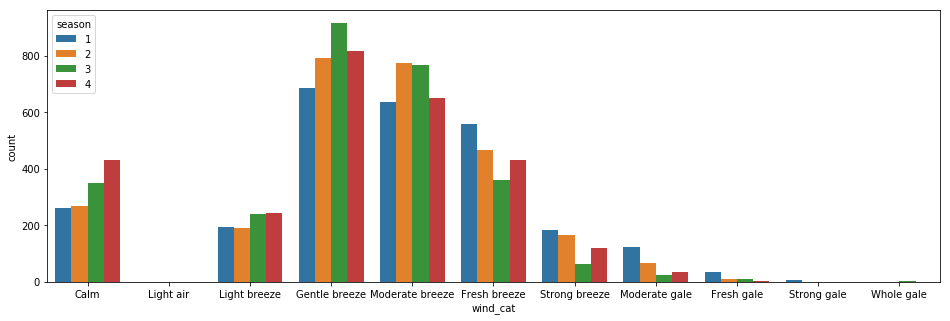

In [26]:
plt.figure(figsize=(16,5))
sns.countplot(x=df['wind_cat'],hue=df['season'])

Wind speed for [0-3] mph is not present, and we can observe that data is right skewed because very few people travel during high wind speeds and most number of people travel during moderate wind speeds. From above plot we can say that-- on days which has wind speed less than 24mph people travels more.

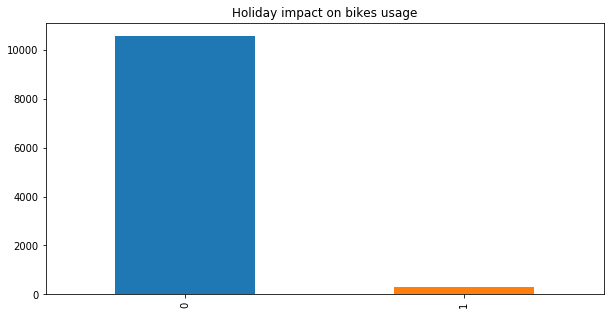

In [33]:
# Holiday Analysis

df["holiday"].value_counts().plot(kind="bar",figsize=(10,5),title="Holiday impact on bikes usage")

In [18]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

Obs- bikes are being used mostly on weekdays...on holidays very less use.

In [34]:
x=df['holiday'].value_counts()
x.index

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category')

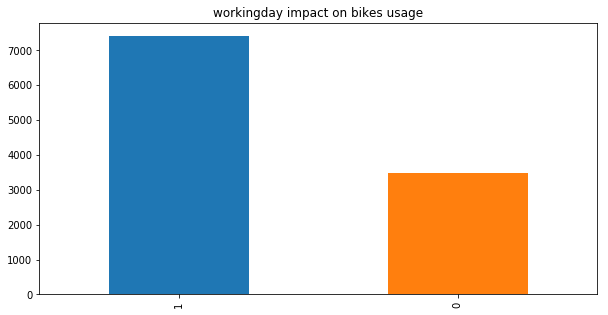

In [36]:
# workingday Analysis

df["workingday"].value_counts().plot(kind="bar",figsize=(10,5),title="workingday impact on bikes usage")


from above plots we can see that most of the rides are on working days compared to the holiday

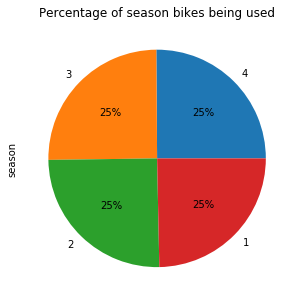

In [29]:
# Season Analysis

df["season"].value_counts().plot(kind="pie",autopct='%1.0f%%',figsize=(10,5),title="Percentage of season bikes being used")

In [279]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

From above we can say that we have equal amount of data from all sesons

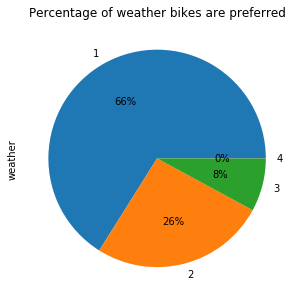

In [30]:
# weather Analysis

df["weather"].value_counts().plot(kind="pie",autopct='%1.0f%%',figsize=(10,5),title="Percentage of weather bikes are preferred")

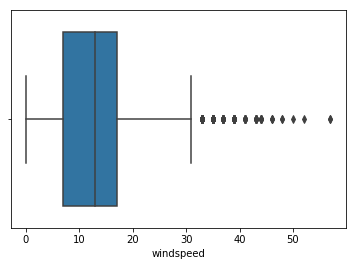

In [37]:
sns.boxplot(df['windspeed'])

There are more outliers in the wind speed

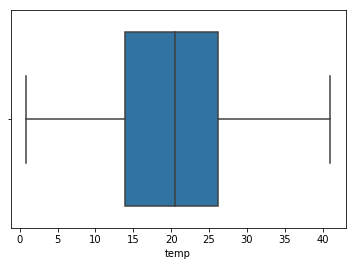

In [38]:
sns.boxplot(df['temp'])

No outliers in Temperature 

In [39]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

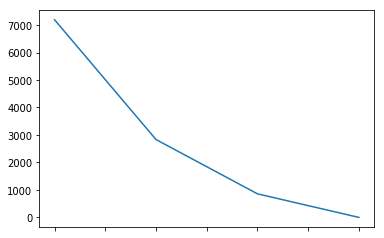

In [40]:
df['weather'].value_counts().plot()

There is only one row data availale for weather type 4 we can consider it as an outlier

In [41]:
x=pd.DataFrame(df.groupby(df['weather'])['count'].sum())
x=x.reset_index()
x

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


There are more number of rides taken place in weather condition 1 compared to other weathers. 

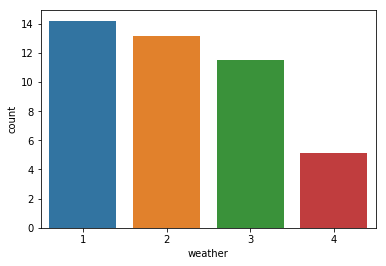

In [43]:
sns.barplot(x=x['weather'],y=np.log(x['count']))

To get more visual understanding converted the data to log

In [44]:
x=pd.DataFrame(df.groupby(df['workingday'])['count'].sum())
x=x.reset_index()
x

,workingday,count
0,0,654872
1,1,1430604


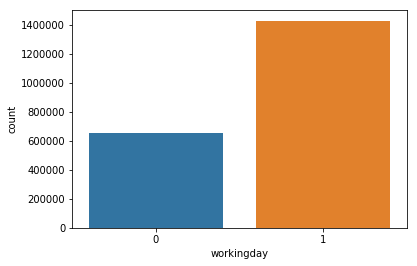

In [45]:
sns.barplot(x=x['workingday'],y=x['count'])

More number of rides were taken place on working days compared to non working days considering 1 as working day and 
0 as non working day

In [46]:
x=pd.DataFrame(df.groupby(df['season'])['count'].sum())
x=x.reset_index()
x

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


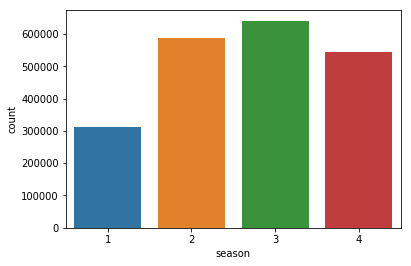

In [47]:
sns.barplot(x=x['season'],y=x['count'])

1: spring, 2: summer, 3: fall, 4: winter
Less number of rides were taken place in spring season compared to other seasons and 
in fall season more number of rides were happened

In [48]:
x=pd.DataFrame(df.groupby(df['holiday'])['count'].sum())
x=x.reset_index()
x

,holiday,count
0,0,2027668
1,1,57808


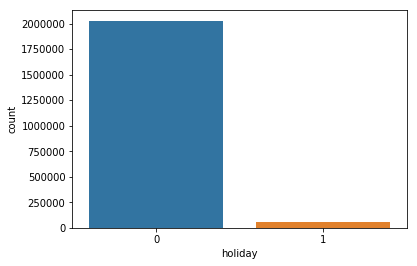

In [49]:
sns.barplot(x=x['holiday'],y=x['count'])

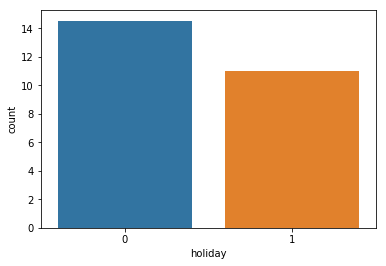

In [50]:
sns.barplot(x=x['holiday'],y=np.log(x['count']))

Less number of rides were happened on holidays, we can infer that most of the people use Yulu to commute to workplaces.

In [51]:
x=pd.DataFrame(df.groupby(df['wind_cat'])['count'].sum())
x=x.reset_index()
x

,wind_cat,count
0,Calm,211526
1,Light air,0
2,Light breeze,128938
3,Gentle breeze,586141
4,Moderate breeze,590389
5,Fresh breeze,387342
6,Strong breeze,118882
7,Moderate gale,51007
8,Fresh gale,10053
9,Strong gale,659


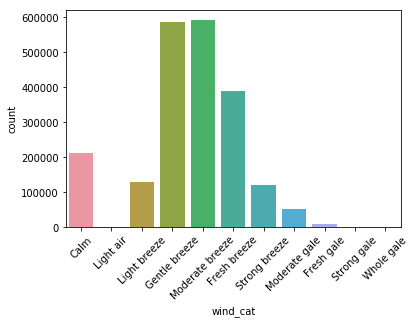

In [52]:
g=sns.barplot(x=x['wind_cat'],y=x['count'])
g.set_xticklabels(labels = x['wind_cat'], rotation = 45)
plt.show()

Most of the rides takes place when there is Gentle,Moderate and fresh breeze.
Users prefer Yulu when the climate is clear

##### Working Day has effect on number of electric cycles rented

In [53]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,year,wind_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,2011,Calm
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011,Calm
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,2011,Calm
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,2011,Calm
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,2011,Calm


In [54]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
day           10886 non-null int64
month         10886 non-null int64
hour          10886 non-null int64
year          10886 non-null category
wind_cat      10886 non-null category
dtypes: category(6), datetime64[ns](1), float64(3), int64(7)
memory usage: 1000.4 KB


In [56]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,year,wind_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,2011,Calm
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011,Calm
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,2011,Calm
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,2011,Calm
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,2011,Calm


In [57]:
df['day'] = df['datetime'].dt.day

df['month'] = df['datetime'].dt.month

df['hour'] = df['datetime'].dt.hour

df['year'] = df['datetime'].dt.year

In [58]:
x=pd.DataFrame(df.groupby([df['month'],df['year']])['count'].sum())
x=x.reset_index()
x

,month,year,count
0,1,2011,23552
1,1,2012,56332
2,2,2011,32844
3,2,2012,66269
4,3,2011,38735
5,3,2012,94766
6,4,2011,50517
7,4,2012,116885
8,5,2011,79713
9,5,2012,120434


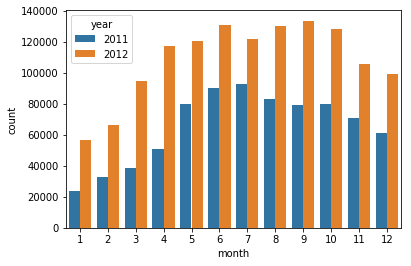

In [59]:
sns.barplot(x=x['month'],y=x['count'],hue=x['year'])

There is a potential increase of rides from 2011 to 2012 in every month.

In [60]:
x=pd.DataFrame(df.groupby(df['year'])['count'].sum())
x=x.reset_index()
x

,year,count
0,2011,781979
1,2012,1303497


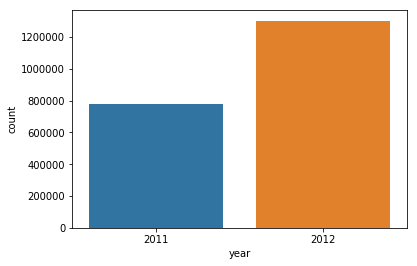

In [61]:
sns.barplot(x=x['year'],y=x['count'])

number of rides in 2012 are increased compared to 2011 

In [62]:
df.loc[df['workingday'] == 0].groupby([df['day'],df['month'],df['year']])['count'].sum()

day  month  year
1    1      2011     985
            2012    2294
     4      2012    6041
     5      2011    3351
     7      2012    5531
     9      2012    6140
     10     2011    2429
     12     2012    5191
2    1      2011     801
            2012    1951
     4      2011    2252
     6      2012    8120
     7      2011    5119
     9      2012    5810
     10     2011    2918
     12     2012    4649
3    3      2012    4066
     4      2011    3249
     6      2012    7641
     7      2011    4649
     9      2011    4484
            2012    6034
     11     2012    5138
     12     2011    3614
4    2      2012    2832
     3      2012    3423
     6      2011    5342
     7      2011    6043
            2012    7403
     8      2012    6824
                    ... 
16   1      2012    2298
     4      2011     795
            2012    6370
     6      2012    7702
     7      2011    5923
     9      2012    7333
     10     2011    5041
     12     2012    3786
17   1  

In [63]:
df.loc[df['workingday']==1].groupby([df['day'],df['month'],df['year']])['count'].sum()

day  month  year
1    2      2011    1360
            2012    4579
     3      2011    1851
            2012    4990
     4      2011    2227
     5      2012    5740
     6      2011    3974
            2012    4127
     7      2011    5362
     8      2011    4266
            2012    7580
     9      2011    5115
     10     2012    6778
     11     2011    4068
            2012    5986
     12     2011    3727
2    2      2011    1526
            2012    3761
     3      2011    2134
            2012    3194
     4      2012    5936
     5      2011    4401
            2012    6169
     6      2011    4968
     7      2012    6227
     8      2011    4845
            2012    7261
     9      2011    4727
     10     2012    4639
     11     2011    4186
                    ... 
18   4      2011    3429
            2012    4367
     5      2011    3855
            2012    7639
     6      2012    5099
     7      2011    4458
            2012    5713
     8      2011    3805
     9  

### Working Day has effect on number of electric cycles rented -- 2- Sample T-Test

Lets groupby the data by number of rides per each day and split them into working and not working days.

In [64]:
count_not_working= pd.DataFrame(df.loc[df['workingday']==0].groupby([df['day'],df['month'],df['year']])['count'].sum())

In [65]:
count_not_working.shape

(145, 1)

In [66]:
count_not_working=count_not_working.reset_index()
count_not_working=count_not_working.sort_values(by='count')

In [67]:
count_not_working

,day,month,year,count
42,6,3,2011,605
116,16,4,2011,795
8,2,1,2011,801
62,9,1,2011,822
53,8,1,2011,959
0,1,1,2011,985
123,17,1,2011,1000
33,5,2,2011,1005
114,16,1,2011,1204
105,15,1,2011,1248


In [69]:
count_working = pd.DataFrame(df.loc[df['workingday']==1].groupby([df['day'],df['month'],df['year']])['count'].sum())

In [70]:
count_working.head()

count
day month year       
1   2     2011   1360
          2012   4579
    3     2011   1851
          2012   4990
    4     2011   2227

In [71]:
count_working.shape

(311, 1)

In [72]:
count_working=count_working.reset_index()

In [73]:
count_working.sort_values(by ='count')

,day,month,year,count
151,10,3,2011,623
277,18,1,2011,683
113,7,12,2011,705
179,12,1,2011,1162
163,11,1,2011,1263
147,10,1,2011,1321
32,3,1,2011,1349
0,1,2,2011,1360
195,13,1,2011,1406
213,14,1,2011,1421


we assume here the alpha as 0.05 and the pvalue > alpha , we can consider these two samples to perform ttest

In [80]:
stat.ttest_ind(count_working['count'].sample(80),count_not_working['count'].sample(80))

Ttest_indResult(statistic=1.3284106180263813, pvalue=0.18595804468638133)

#### No. of cycles rented similar or different in different seasons -- ANOVA

In [81]:
df['season'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [82]:
season_1= pd.DataFrame(df.loc[df['season']==1].groupby([df['day'],df['month'],df['year']])['count'].sum())

In [83]:
season_1=season_1.reset_index()
season_1=season_1.sort_values(by='count')

In [84]:
season_1

,day,month,year,count
34,6,3,2011,605
58,10,3,2011,623
102,18,1,2011,683
6,2,1,2011,801
48,9,1,2011,822
42,8,1,2011,959
0,1,1,2011,985
96,17,1,2011,1000
26,5,2,2011,1005
66,12,1,2011,1162


In [86]:
season_2= pd.DataFrame(df.loc[df['season']==2].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
season_2=season_2.sort_values(by='count')
season_2

,day,month,year,count
90,16,4,2011,795
42,8,4,2011,1471
24,5,4,2011,1795
66,12,4,2011,2034
72,13,4,2011,2162
0,1,4,2011,2227
6,2,4,2011,2252
48,9,4,2011,2455
20,4,5,2011,2633
30,6,4,2011,2808


In [87]:
season_3= pd.DataFrame(df.loc[df['season']==3].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
season_3=season_3.sort_values(by='count')
season_3

,day,month,year,count
46,8,9,2011,1842
40,7,9,2011,1996
34,6,9,2011,2710
28,5,9,2011,3351
52,9,9,2011,3544
14,3,8,2011,3574
88,15,9,2011,3659
38,7,8,2011,3785
104,18,8,2011,3805
80,14,8,2011,3820


In [88]:
season_4= pd.DataFrame(df.loc[df['season']==4].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
season_4=season_4.sort_values(by='count')
season_4

,day,month,year,count
40,7,12,2011,705
92,16,11,2011,1817
66,12,10,2011,2416
108,19,10,2011,2424
0,1,10,2011,2429
106,18,12,2011,2431
34,6,12,2011,2594
100,17,12,2011,2739
64,11,12,2011,2743
72,13,10,2011,2913


In [89]:
np.var(season_1['count'])

2107165.9556786707

In [90]:
np.var(season_2['count'])

2811640.8291782085

In [91]:
np.var(season_3['count'])

2036263.220683286

In [92]:
np.var(season_4['count'])

2147031.649738381

(array([14., 32., 20., 17., 14.,  8.,  3.,  5.,  0.,  1.]),
 array([ 605. , 1328.1, 2051.2, 2774.3, 3497.4, 4220.5, 4943.6, 5666.7,
        6389.8, 7112.9, 7836. ]),
 <a list of 10 Patch objects>)

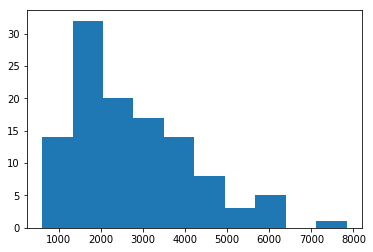

In [93]:
plt.hist(season_1['count'])

(array([ 1.,  1., 10., 18., 18., 20., 25.,  8.,  5.,  8.]),
 array([ 705. , 1450.1, 2195.2, 2940.3, 3685.4, 4430.5, 5175.6, 5920.7,
        6665.8, 7410.9, 8156. ]),
 <a list of 10 Patch objects>)

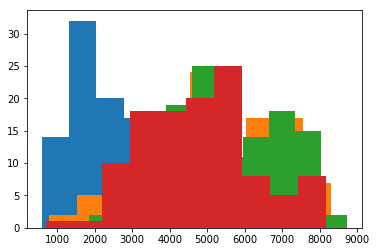

In [94]:
plt.hist(season_1['count'])
plt.hist(season_2['count'])
plt.hist(season_3['count'])
plt.hist(season_4['count'])

The samples are not normally distributed so we will test with levene's as it is performed for 

In [95]:
stat.levene(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

LeveneResult(statistic=1.5071252673249398, pvalue=0.21194448921499898)

In [96]:
stat.f_oneway(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

F_onewayResult(statistic=80.0504789788067, pvalue=1.506580502991204e-41)

#### No. of cycles rented similar or different in different weather -- ANOVA

In [98]:
df['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [99]:
weather_1= pd.DataFrame(df.loc[df['weather']==1].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_1=weather_1.sort_values(by='count')
weather_1

,day,month,year,count
305,14,5,2012,2
226,11,1,2011,15
281,13,5,2011,20
186,9,3,2011,20
348,16,3,2011,27
229,11,2,2012,48
256,12,4,2011,49
158,7,12,2011,49
395,18,4,2012,52
163,8,2,2012,56


In [100]:
weather_2= pd.DataFrame(df.loc[df['weather']==2].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_2=weather_2.sort_values(by='count')
weather_2

,day,month,year,count
114,7,2,2012,5
65,4,6,2012,5
101,6,7,2012,7
204,12,7,2011,8
278,16,7,2012,11
126,7,12,2011,13
196,12,1,2011,13
173,10,5,2012,14
248,15,2,2011,20
36,3,3,2011,23


In [101]:
weather_3= pd.DataFrame(df.loc[df['weather']==3].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_3=weather_3.sort_values(by='count')
weather_3

,day,month,year,count
74,8,2,2011,1
42,4,8,2011,3
123,13,1,2012,3
63,7,1,2011,5
64,7,3,2011,6
149,16,3,2011,11
175,19,1,2011,12
4,1,3,2012,12
109,11,3,2011,13
41,4,6,2012,14


In [102]:
weather_4= pd.DataFrame(df.loc[df['weather']==4].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_4=weather_4.sort_values(by='count')
weather_4

,day,month,year,count
0,9,1,2012,164


Removing the weather 4 as there is no much data in the weather 4 condition

(array([25., 31., 35., 32., 32., 23.,  6.,  2.,  0.,  1.]),
 array([ 1.        ,  7.17773845, 13.35547689, 19.53321534, 25.71095379,
        31.88869223, 38.06643068, 44.24416912, 50.42190757, 56.59964602,
        62.77738446]),
 <a list of 10 Patch objects>)

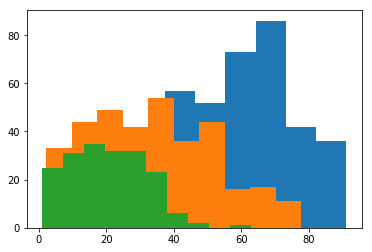

In [103]:
plt.hist(np.sqrt(weather_1['count']))
plt.hist(np.sqrt(weather_2['count']))
plt.hist(np.sqrt(weather_3['count']))
# plt.hist(weather_4['count'])

The data is not normally distributed so we need to perform levene's test.

In [104]:
stat.levene(np.sqrt(weather_1['count']),np.sqrt(weather_2['count']),np.sqrt(weather_3['count']))

LeveneResult(statistic=33.64696582500653, pvalue=7.495205135432121e-15)

In [105]:
stat.f_oneway(weather_1['count'],weather_2['count'],weather_3['count'])

F_onewayResult(statistic=244.75558358157312, pvalue=1.0951526874746051e-86)

#### Weather is dependent on season -- Chi-sq

In [106]:
#Contingency Table
contingency_table=pd.crosstab(df['weather'],df['season'])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


In [107]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[1759 1801 1930 1702]
 [ 715  708  604  807]
 [ 211  224  199  225]
 [   1    0    0    0]]


In [108]:
b=stat.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [109]:
#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:4,0])
no_of_columns=len(contingency_table.iloc[0,0:4])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",df)


Degree of Freedom: 9


In [110]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:   ",chi_square_statistic)

chi-square statistic:    3.3970813914527893


In [111]:
#critical_value
critical_value=chi2.ppf(q=1-0.05,df=df)
print('critical_value:',critical_value)

critical_value: 16.918977604620448


In [112]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 0.9464543759349711


In [113]:
print('Significance level: 0.05')
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level: 0.05
Degree of Freedom:  9
chi-square statistic: 3.3970813914527893
critical_value: 16.918977604620448
p-value: 0.9464543759349711


In [114]:
if p_value<=0.05:
    print("Reject H0,There is a dependancy  between 2 categorical variables")
else:
    print("Retain H0,There is no dependancy between 2 categorical variables")

Retain H0,There is no dependancy between 2 categorical variables


### Business Insights

### Recommendations :